In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv

## Parsing 'https://hh.kz/' DATA ANALYST position information in CIS countries (Kazakhstan, Georgia, Kyrgyzstan, Uzbekistan, Azerbaidjan, Russia)

In [2]:
CSV = 'vacancies.csv'
HOST = 'https://hh.kz/'
#page for scraping
URL = 'https://hh.kz/search/vacancy?text=Data+analyst&salary=&area=160&area=159&area=1&area=2&area=2760&area=2759&area=2492&area=2758&ored_clusters=true&enable_snippets=true'
HEADERS = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'
}

In [3]:
#scrape all html page content.
def get_html(url, params=' '):
    r = requests.get(url, headers=HEADERS, params=params)
    return r

In [4]:
#finding what we need in scraped html page content
def get_content(html):
    soup = BeautifulSoup(html, 'html.parser')
    items = soup.find_all('div', class_="vacancy-serp-item__layout")
    vacancies = []
    
    for item in items:
        vacancies.append({'job_title': item.find('div').find('a', class_='serp-item__title').get_text(strip=True),
                          'city': item.find('div',  class_='vacancy-serp-item-company').get_text(strip=True),
                          'company': item.find('div',  class_='vacancy-serp-item__info').find('div', class_='bloko-text').get_text(strip=True),
                          'text': item.find('div', class_='g-user-content').get_text(strip=True)
                          })
                        
    return vacancies 

In [6]:
#function to save scraped data
def save_doc(items, path):
    with open(path, 'w', newline ='', encoding="utf-8") as file:
        writer=csv.writer(file, delimiter = ';')
        writer.writerow(['job_title', 'city', 'company', 'text'])
        for item in items:
            writer.writerow([item['job_title'], item['city'], item['company'], item['text']])

In [7]:
html = get_html(URL) 
get_content(html.text)

[{'job_title': 'Senior Sales Operations Analyst / Старший аналитик продаж',
  'city': '«Procter & Gamble», Опытный специалистМосква,Войковская',
  'company': '«Procter & Gamble», Опытный специалист',
  'text': '...budget data is reflected in P&G’s internal system. Support internal Sales partners (e.g., Account Managers) with data...Any higher education degree. Good command of English (Intermediate or higher level). Strong communication and analytical skills, attention to details.'},
 {'job_title': 'Аналитик данных / Data Analyst',
  'city': 'ЮрентМосква',
  'company': 'Юрент',
  'text': 'Проверка продуктовых гипотез. Проведение Ad-hoc аналитики для поддержки принятия бизнес-решений. Поиск и исследование источников данных. Разработка и валидация...Опыт от 3-х лет в роли Аналитика данных, Системного аналитика. Отличные знания SQL и Python. Навыки визуализации данных, умение...'},
 {'job_title': 'Data analyst',
  'city': 'ТООМИКРОФИНАНСОВАЯ ОРГАНИЗАЦИЯ KREDIT SEVEN KAZAKHSTAN (КРЕДИТ СЕВЕ

In [8]:
def parser():
    PAGENATION = input('Enter number of pages to be parsed: ')
    PAGENATION = int(PAGENATION.strip())
    html = get_html(URL)
    if html.status_code == 200:
        vacancies = []
        for page in range(0, PAGENATION):
            print(f'parsing page: {page}')
            html = get_html(URL, params={'page': page })
            vacancies.extend(get_content(html.text))
            save_doc(vacancies, CSV)
        pass
    else:
        print('html error')

In [9]:
parser()

Enter number of pages to be parsed: 34
parsing page: 0
parsing page: 1
parsing page: 2
parsing page: 3
parsing page: 4
parsing page: 5
parsing page: 6
parsing page: 7
parsing page: 8
parsing page: 9
parsing page: 10
parsing page: 11
parsing page: 12
parsing page: 13
parsing page: 14
parsing page: 15
parsing page: 16
parsing page: 17
parsing page: 18
parsing page: 19
parsing page: 20
parsing page: 21
parsing page: 22
parsing page: 23
parsing page: 24
parsing page: 25
parsing page: 26
parsing page: 27
parsing page: 28
parsing page: 29
parsing page: 30
parsing page: 31
parsing page: 32
parsing page: 33


In [10]:
h = pd.read_csv(r'C:\Users\User\Downloads\vacancies.csv', delimiter=';')
h.head()

,job_title,city,company,text
0,Аналитик данных / Data Analyst,Сбер. Экспертам и руководителямМосква,Сбер. Экспертам и руководителям,Проверять продуктовые гипотезы и готовить Ad-h...
1,Аналитик данных / Data Analyst,ЮрентМосква,Юрент,Проверка продуктовых гипотез. Проведение Ad-ho...
2,Junior Data Analyst,ОООЛингуаЛеоМосква,ОООЛингуаЛео,Строить дашборды в Yandex Datalens. — Готовить...
3,Аналитик данных | Data Analyst,ОООЗигмунд ОнлайнМосква,ОООЗигмунд Онлайн,Выстроить аналитическую структуру и культуру и...
4,Аналитик данных/Data Analyst,UFS.travelМосква,UFS.travel,Провести аудит и последующую настройку наших с...


In [11]:
h.shape

(680, 4)

In [12]:
h['job_title_un'] = 'Data Analyst' 

## Parsing 'https://hh.kz/' DATA SCIENTIST position information in CIS countries (Kazakhstan, Georgia, Kyrgyzstan, Uzbekistan, Azerbaidjan, Russia)

In [13]:
CSV = 'vacancies_ds.csv'
HOST = 'https://hh.kz/' #сайт из которого мы будем тянуть данные
URL = 'https://hh.kz/search/vacancy?text=Data+scientist&from=suggest_post&salary=&area=160&area=159&area=1&area=2&area=2760&area=2759&area=2492&area=2758&ored_clusters=true&enable_snippets=true'
#конкретная страница с которой мы будем брать информацию
HEADERS = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'
}


In [14]:
#scrape all html page content.
def get_html_ds(url, params=' '):
    r = requests.get(url, headers=HEADERS, params=params)
    return r

In [15]:
#finding what we need in scraped html page content
def get_content_ds(html):
    soup = BeautifulSoup(html, 'html.parser')
    items = soup.find_all('div', class_="vacancy-serp-item__layout")
    vacancies_ds = []
    
    for item in items:
        vacancies_ds.append({'job_title': item.find('div').find('a', class_='serp-item__title').get_text(strip=True),
                          'city': item.find('div',  class_='vacancy-serp-item-company').get_text(strip=True),
                          'company': item.find('div',  class_='vacancy-serp-item__info').find('div', class_='bloko-text').get_text(strip=True),
                          'text': item.find('div', class_='g-user-content').get_text(strip=True)
                          })
                        
    return vacancies_ds 

In [19]:
def save_doc_ds(items, path):
    with open(path, 'w', newline ='', encoding="utf-8") as file:
        writer=csv.writer(file, delimiter = ';')
        writer.writerow(['job_title', 'city', 'company', 'text'])
        for item in items:
            writer.writerow([item['job_title'], item['city'], item['company'], item['text']])

In [20]:
def parser_ds():
    PAGENATION = input('Enter number of pages to be parsed: ')
    PAGENATION = int(PAGENATION.strip())
    html = get_html_ds(URL)
    if html.status_code == 200:
        vacancies_ds = []
        for page in range(0, PAGENATION):
            print(f'parsing page: {page}')
            html = get_html_ds(URL, params={'page': page })
            vacancies_ds.extend(get_content_ds(html.text))
            save_doc_ds(vacancies_ds, CSV)
        pass
    else:
        print('html error')

In [21]:
parser_ds()

Enter number of pages to be parsed: 6
parsing page: 0
parsing page: 1
parsing page: 2
parsing page: 3
parsing page: 4
parsing page: 5


In [22]:
h_ds = pd.read_csv(r'C:\Users\User\Downloads\vacancies_ds.csv', delimiter=';')
h_ds.head()

,job_title,city,company,text
0,Data scientist,"НАО Финансовые системыМосква,Минская",НАО Финансовые системы,Разработка скоринг системы. Поиск и обработка ...
1,Data scientist,АсторМосква,Астор,Работа в команде по созданию модуля Data Scien...
2,"Data Scientist, Поисковый рантайм, NLP","ТООExpertonicaАлматы,Байконури еще1",ТООExpertonica,"Предстоит возглавить команду, которая будет со..."
3,Data Scientist (Middle+),DIGINETICAМосква,DIGINETICA,Разрабатывать модели схожести запросов и товар...
4,Data Scientist,ОООRetail RocketМосква,ОООRetail Rocket,Развивать систему метрик для оценки качества р...


In [23]:
h_ds.shape

(120, 4)

In [24]:
h_ds['job_title_un'] = 'Data Scientist' 

## Concatinating dataframes 'h' and 'h_ds'

In [49]:
ds_df = pd.concat([h, h_ds],ignore_index=True)
ds_df.shape

(800, 5)

In [50]:
ds_df.head(2)

,job_title,city,company,text,job_title_un
0,Аналитик данных / Data Analyst,Сбер. Экспертам и руководителямМосква,Сбер. Экспертам и руководителям,Проверять продуктовые гипотезы и готовить Ad-h...,Data Analyst
1,Аналитик данных / Data Analyst,ЮрентМосква,Юрент,Проверка продуктовых гипотез. Проведение Ad-ho...,Data Analyst


In [51]:
#The problem is that in addition to the name of the city, the name of the company was also parsed into the city column

c=[] #a list of cities that will be used to add to the table

for i in ds_df['city']:
    if 'Астана' in i:
        c.append('Astana')
    elif 'Алматы' in i:
        c.append('Almaty')
    elif 'Тбилиси' in i:
        c.append('Tbilisi')
    elif 'Бишкек' in i:
        c.append('Bishkek')
    elif 'Ташкент' in i:
        c.append('Tashkent')
    elif 'Баку' in i:
        c.append('Baku')
    elif 'Москва' in i:
        c.append('Moscow')
    elif 'Петербург' in i:
        c.append('St.Peterburg')
    else:
        c.append(i)


len(c)

800

In [52]:
#creating a new column with a code without extra characters
ds_df.insert(1, 'city_name', c)
ds_df.head(2)

,job_title,city_name,city,company,text,job_title_un
0,Аналитик данных / Data Analyst,Moscow,Сбер. Экспертам и руководителямМосква,Сбер. Экспертам и руководителям,Проверять продуктовые гипотезы и готовить Ad-h...,Data Analyst
1,Аналитик данных / Data Analyst,Moscow,ЮрентМосква,Юрент,Проверка продуктовых гипотез. Проведение Ad-ho...,Data Analyst


In [53]:
#all english words from multilanguage text
ds_df['tools'] = ds_df['text'].str.findall(r"[a-zA-Z]+")

In [54]:
ds_df.head(2)

,job_title,city_name,city,company,text,job_title_un,tools
0,Аналитик данных / Data Analyst,Moscow,Сбер. Экспертам и руководителямМосква,Сбер. Экспертам и руководителям,Проверять продуктовые гипотезы и готовить Ad-h...,Data Analyst,"[Ad, hoc, A, B, SQL, Python, Tableau]"
1,Аналитик данных / Data Analyst,Moscow,ЮрентМосква,Юрент,Проверка продуктовых гипотез. Проведение Ad-ho...,Data Analyst,"[Ad, hoc, SQL, Python]"


In [55]:
united_text = []
for i in ds_df['tools']:
    i = ' '.join(i)
    united_text.append(i)
    
united_text = ' '.join(united_text)
united_text

'Ad hoc A B SQL Python Tableau Ad hoc SQL Python Yandex Datalens SQL Yandex Datalens SQL CTE UNION EXCEPT INTERSECT Google Analytics Google Firebase Google Tag Manager Appsflyer e com Google Analytics e commerce Python ML Excel Power BI Python SQL  ad hoc Python SQL GIT Excel Power BI Python SQL Assist your colleagues in gaining access to the right data Actively collaborate with your colleagues and learn from each other Combine data insights with business understanding and market knowledge year s experience in marketing or analytical departments like ETL Airflow  BI Python SQL SQL SQL SQL postman python  GTM GA Yandex Metrica GTM Google Analytics GA Bitrix Excel Google Sheets Data Science agile Ad Hock SQL Power BI Excel Data Warehousing Big Data Hadoop Spark Hive Impala Gathers business intelligence from a variety of sources including company data industry and field reports public information or purchased sources Ability to collect and compile relevant data Extremely organized with gr

In [32]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


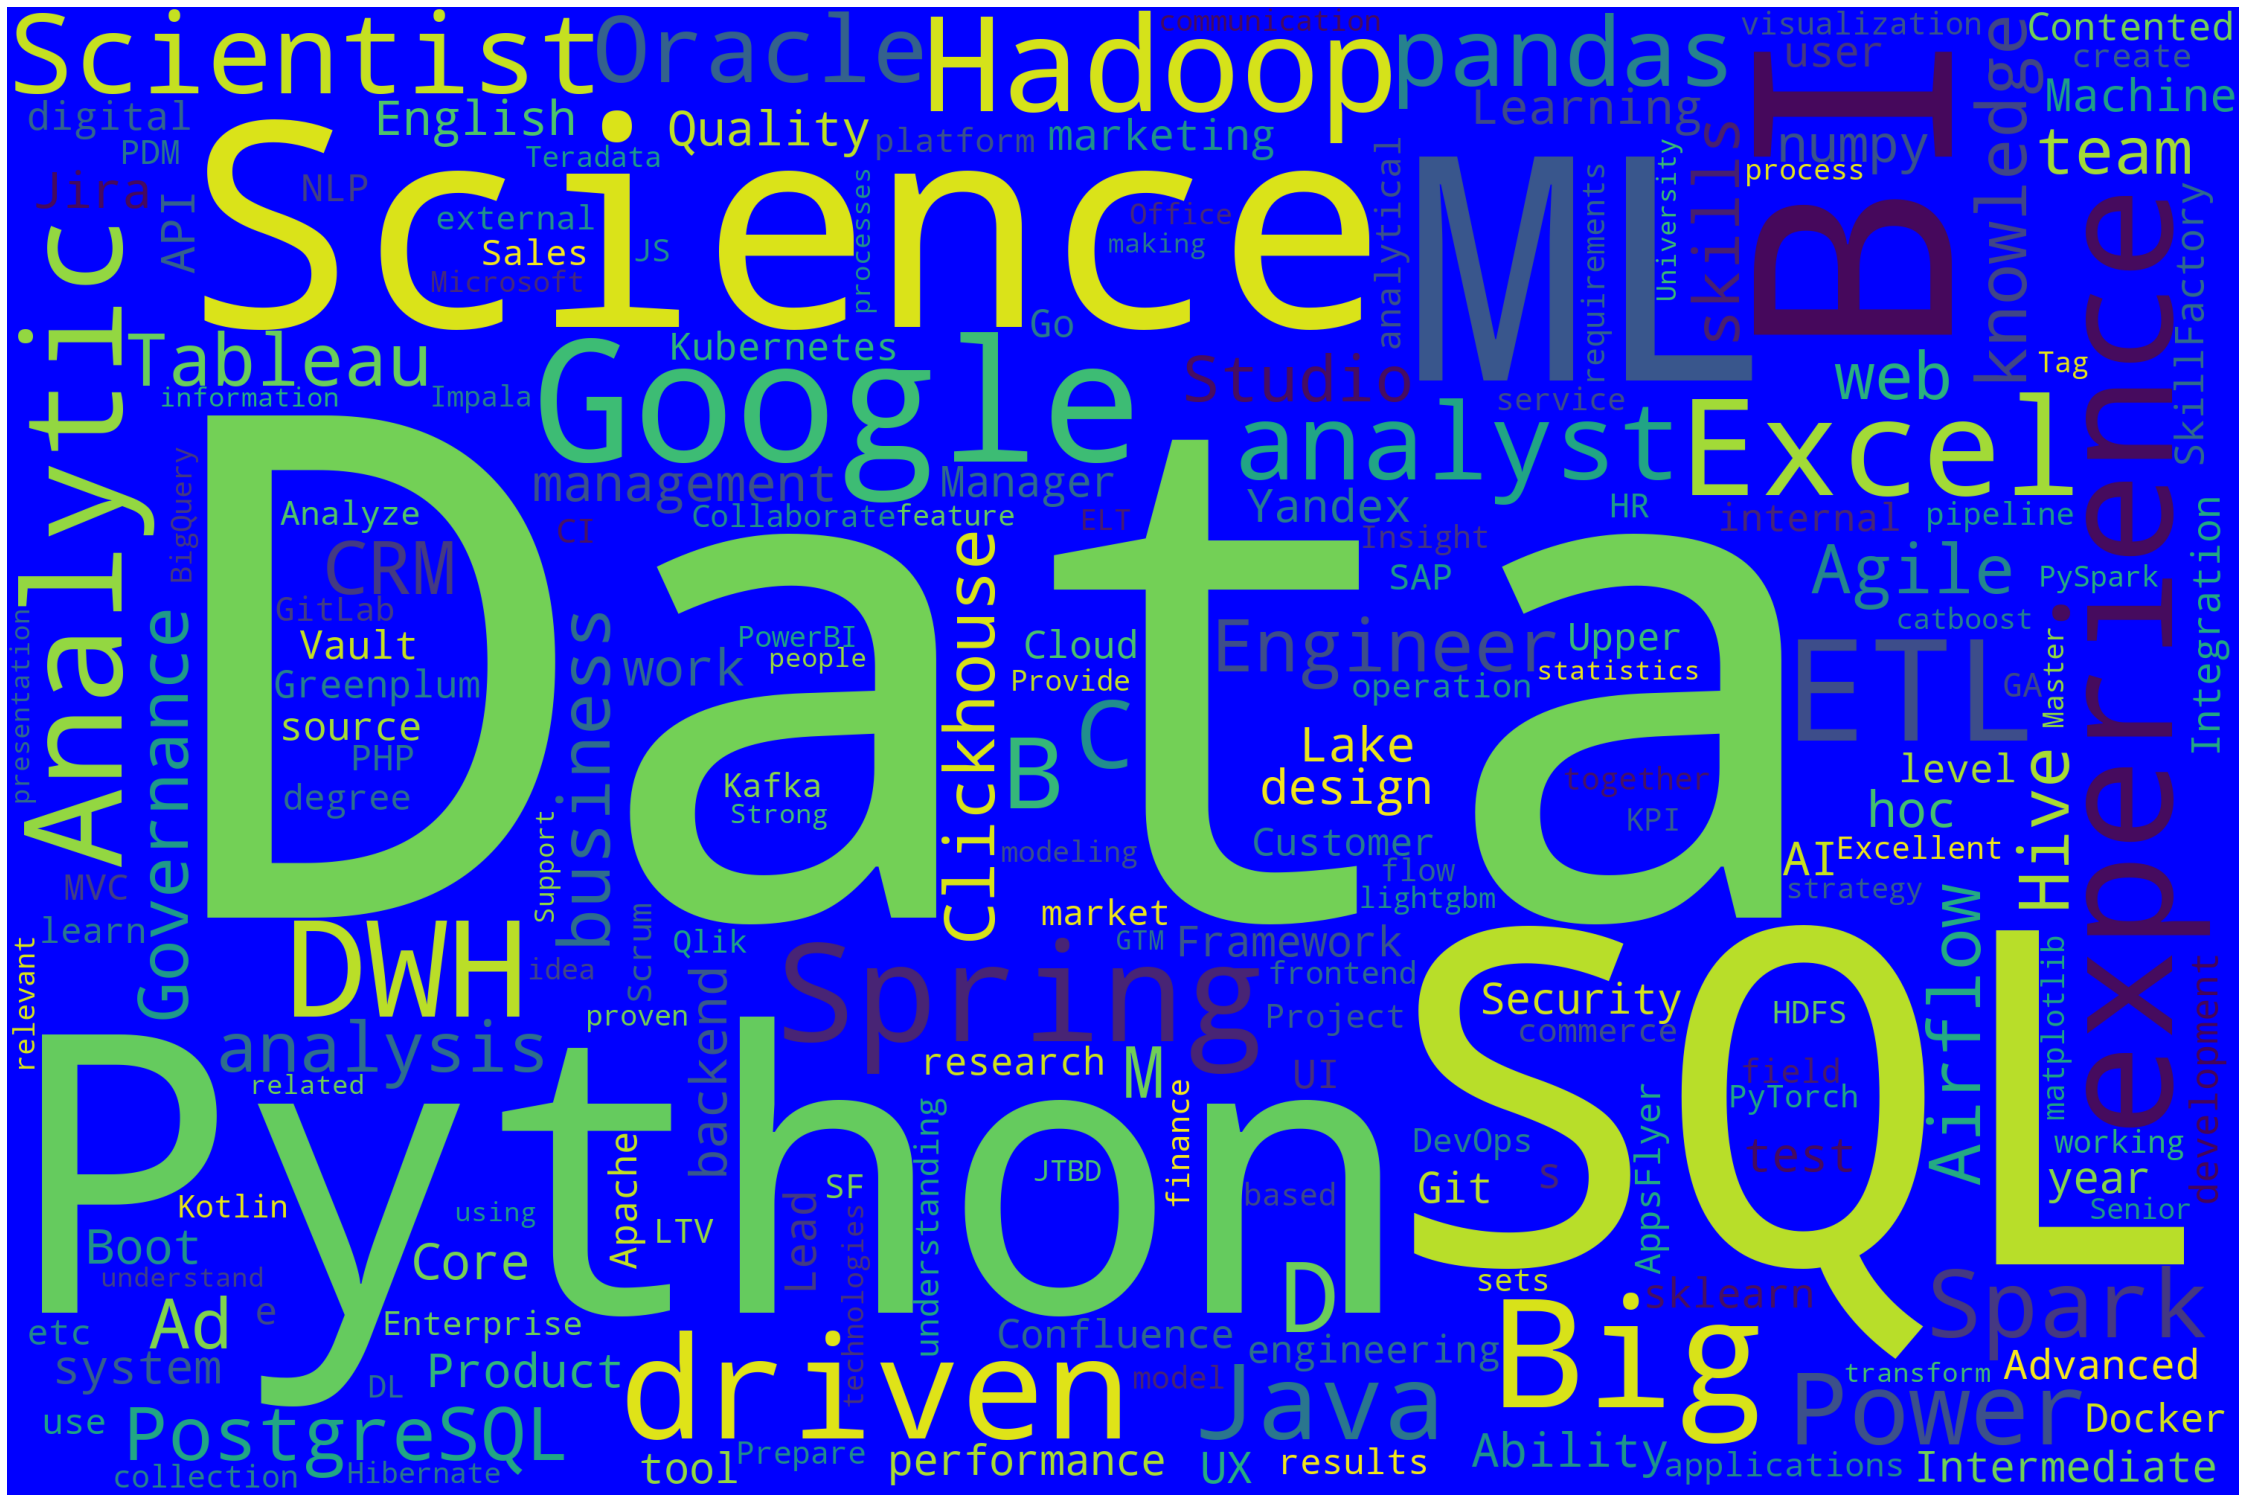

In [56]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
# stopwords is a collection of words that dont convey meaning. mostly pronouns such as he she etc.

#generate word cloud
united_text # the input of the wordcloud generator
#generate the wordcloud object, set the height and width, set the random_state parameter to ensure
# reproducibility of results and set the stopwords parameter so that the irrelevant words such as pronouns are discarded.
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False, stopwords = STOPWORDS).generate(united_text)
# text is the input to the generate() method
#draw the figure
#Set figure size
plt.figure(figsize=(40, 30))
# Display image
plt.imshow(wordcloud) 
# No axis 
plt.axis("off")
plt.show()

In [57]:
# Need to insert additional columns in ds_df to analyse 
# For this purpose lists of technologies to be created by typing words from vizualization above, that would be filled with 1 and 0
Python = []
SQL = []
Excel = []
Hadoop = []
PostgreSQL = []
Spark = []
Java = []
Power = []
Airflow = []
Tableau = []
Jira = []
Pandas = []
UX = []
Oracle = []
sklearn = []
Hive = []
numpy = []
ETL = []
Kotlin = []


for i in ds_df['tools']:      
    if 'Python' in i:
        Python.append('1')
    elif 'python'in i:
        Python.append('1')
    else:
        Python.append('0')        
for i in ds_df['tools']:      
    if 'SQL' in i:
        SQL.append('1')
    else:
        SQL.append('0')
for i in ds_df['tools']:      
    if 'Excel' in i:
        Excel.append('1')
    elif 'excel' in i:
        Excel.append('1')
    else:
        Excel.append('0')        
for i in ds_df['tools']:      
    if 'Hadoop' in i:
        Hadoop.append('1')
    elif 'hadoop' in i:
        Hadoop.append('1')
    else:
        Hadoop.append('0')
for i in ds_df['tools']:      
    if 'PostgreSQL' in i:
        PostgreSQL.append('1')
    elif 'postgreSQL' in i:
        PostgreSQL.append('1')
    else:
        PostgreSQL.append('0')        
for i in ds_df['tools']:      
    if 'Spark' in i:
        Spark.append('1')
    elif 'spark' in i:
        Spark.append('1')
    else:
        Spark.append('0')        
for i in ds_df['tools']:      
    if 'Java' in i:
        Java.append('1')
    elif 'java' in i:
        Java.append('1')
    else:
        Java.append('0')
for i in ds_df['tools']:      
    if 'Power' in i:
        Power.append('1')
    elif 'power' in i:
        Power.append('1')
    else:
        Power.append('0')     
for i in ds_df['tools']:      
    if 'Airflow' in i:
        Airflow.append('1')
    elif 'airflow' in i:
        Airflow.append('1')
    else:
        Airflow.append('0')                      
for i in ds_df['tools']:      
    if 'Tableau' in i:
        Tableau.append('1')
    elif 'tableau' in i:
        Tableau.append('1')
    else:
        Tableau.append('0')        
for i in ds_df['tools']:      
    if 'Jira' in i:
        Jira.append('1')
    elif 'jira' in i:
        Jira.append('1')
    else:
        Jira.append('0')       
for i in ds_df['tools']:      
    if 'Pandas' in i:
        Pandas.append('1')
    elif 'pandas' in i:
        Pandas.append('1')
    else:
        Pandas.append('0')    
for i in ds_df['tools']:      
    if 'UX' in i:
        UX.append('1')
    elif 'ux' in i:
        UX.append('1')
    else:
        UX.append('0')                     
for i in ds_df['tools']:      
    if 'Oracle' in i:
        Oracle.append('1')
    elif 'oracle' in i:
        Oracle.append('1')
    else:
        Oracle.append('0')                
for i in ds_df['tools']:      
    if 'sklearn' in i:
        sklearn.append('1')
    elif 'Sklearn' in i:
        sklearn.append('1')
    else:
        sklearn.append('0')        
for i in ds_df['tools']:      
    if 'Hive' in i:
        Hive.append('1')
    elif 'hive' in i:
        Hive.append('1')
    else:
        Hive.append('0')       
for i in ds_df['tools']:      
    if 'Numpy' in i:
        numpy.append('1')
    elif 'numpy' in i:
        numpy.append('1')
    else:
        numpy.append('0')                
for i in ds_df['tools']:      
    if 'ETL' in i:
        ETL.append('1')
    elif 'etl' in i:
        ETL.append('1')
    else:
        ETL.append('0')              
for i in ds_df['tools']:      
    if 'Kotlin' in i:
        Kotlin.append('1')
    elif 'kotlin' in i:
        Kotlin.append('1')
    else:
        Kotlin.append('0')  
        
        
print(Python)
print(SQL)
print(Excel)
print(Hadoop)
print(PostgreSQL)
print(Spark)
print(Java)
print(Power)
print(Airflow)
print(Tableau)
print(Jira)
print(Pandas)
print(UX)
print(Oracle)
print(sklearn)
print(Hive)
print(numpy)
print(ETL)
print(Kotlin)

['1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',

In [58]:
#additional columns in ds_df 
ds_df['Python']=Python
ds_df['SQL']=SQL
ds_df['Excel']=Excel
ds_df['Hadoop']=Hadoop
ds_df['PostgreSQL']=PostgreSQL
ds_df['Spark']=Spark
ds_df['Java']=Java
ds_df['Airflow']=Airflow
ds_df['Tableau']=Tableau
ds_df['Jira']=Jira
ds_df['Pandas']=Pandas
ds_df['UX']=UX
ds_df['Oracle']=Oracle
ds_df['sklearn']=Oracle
ds_df['Hive']=Hive
ds_df['numpy']=numpy
ds_df['ETL']=ETL
ds_df['Kotlin']=Kotlin

In [63]:
ds_df['Power']=Power

In [64]:
ds_df.head(10)

,city_name,company,job_title_un,tools,Python,SQL,Excel,Hadoop,PostgreSQL,Spark,...,Jira,Pandas,UX,Oracle,sklearn,Hive,numpy,ETL,Kotlin,Power
0,Moscow,Сбер. Экспертам и руководителям,Data Analyst,"[Ad, hoc, A, B, SQL, Python, Tableau]",1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Moscow,Юрент,Data Analyst,"[Ad, hoc, SQL, Python]",1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Moscow,ОООЛингуаЛео,Data Analyst,"[Yandex, Datalens, SQL, Yandex, Datalens]",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Moscow,ОООЗигмунд Онлайн,Data Analyst,"[SQL, CTE, UNION, EXCEPT, INTERSECT]",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Moscow,UFS.travel,Data Analyst,"[Google, Analytics, Google, Firebase, Google, ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Moscow,ОООRetail Rocket,Data Analyst,"[e, commerce, Python, ML]",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Astana,KIVORK,Data Analyst,"[Excel, Power, BI, Python, SQL]",1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,Almaty,ТООArbuz Group (Арбуз Груп),Data Analyst,[],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Tashkent,ОООPayme (СП ООО Inspired),Data Analyst,"[ad, hoc]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Moscow,HR Prime,Data Analyst,"[Python, SQL, GIT]",1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# since dataframe contains cleared columns with positions, cities and technologies, duplicate columns can be deleted
ds_df.drop(['job_title', 'city', 'text'], axis=1, inplace=True)

In [61]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city_name     800 non-null    object
 1   company       800 non-null    object
 2   job_title_un  800 non-null    object
 3   tools         800 non-null    object
 4   Python        800 non-null    object
 5   SQL           800 non-null    object
 6   Excel         800 non-null    object
 7   Hadoop        800 non-null    object
 8   PostgreSQL    800 non-null    object
 9   Spark         800 non-null    object
 10  Java          800 non-null    object
 11  Airflow       800 non-null    object
 12  Tableau       800 non-null    object
 13  Jira          800 non-null    object
 14  Pandas        800 non-null    object
 15  UX            800 non-null    object
 16  Oracle        800 non-null    object
 17  sklearn       800 non-null    object
 18  Hive          800 non-null    object
 19  numpy   

In [65]:
# int data type for following columns
columns = ['Python', 'SQL', 'Excel', 'Hadoop', 'PostgreSQL', 'Spark', 'Java', 'Power', 'Airflow', 'Tableau', 'Jira', 'Pandas', 'UX', 'Oracle', 'sklearn', 'Hive', 'numpy', 'ETL', 'Kotlin']
ds_df[columns] = ds_df[columns].astype('int')

In [66]:
groupby_title = ds_df.groupby('job_title_un')[['Python', 'SQL', 'Excel', 'Hadoop', 'PostgreSQL', 'Spark', 'Java', 'Airflow', 'Power', 'Tableau', 'Jira', 'Pandas', 'UX', 'Oracle', 'sklearn', 'Hive', 'numpy', 'ETL', 'Kotlin']].sum()
groupby_title.reset_index(inplace= True )
groupby_title.head()

,job_title_un,Python,SQL,Excel,Hadoop,PostgreSQL,Spark,Java,Airflow,Power,Tableau,Jira,Pandas,UX,Oracle,sklearn,Hive,numpy,ETL,Kotlin
0,Data Analyst,100,138,36,26,20,19,29,12,27,23,15,16,14,20,20,17,9,39,7
1,Data Scientist,44,20,1,6,2,5,0,6,1,0,0,12,0,4,4,4,9,2,0


In [67]:
ds_df.shape

(800, 23)

In [69]:
ds_df.to_csv(r'C:\Users\User\Documents\IBM DATA ANALYST\Parsing.csv')

In [70]:
groupby_title.to_csv(r'C:\Users\User\Documents\IBM DATA ANALYST\groupby_title.csv')

In [71]:
groupby_city = ds_df.groupby('city_name')[['Python', 'SQL', 'Excel', 'Hadoop', 'PostgreSQL', 'Spark', 'Java', 'Airflow', 'Power', 'Tableau', 'Jira', 'Pandas', 'UX', 'Oracle', 'sklearn', 'Hive', 'numpy', 'ETL', 'Kotlin']].sum()
groupby_city.reset_index(inplace= True )
groupby_city.head()

,city_name,Python,SQL,Excel,Hadoop,PostgreSQL,Spark,Java,Airflow,Power,Tableau,Jira,Pandas,UX,Oracle,sklearn,Hive,numpy,ETL,Kotlin
0,Almaty,5,6,6,0,0,0,1,1,3,2,0,1,0,1,1,0,1,2,0
1,Astana,3,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Baku,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Moscow,111,124,24,27,20,21,19,15,18,16,13,23,13,20,20,18,14,32,3
4,St.Peterburg,22,24,3,5,2,3,7,2,5,4,2,3,1,3,3,3,2,6,4


In [72]:
groupby_city.to_csv(r'C:\Users\User\Documents\IBM DATA ANALYST\groupby_city.csv')